# Loading training data

In [1]:
import os
print('Current working directory path:',os.getcwd())
os.chdir(r'C:\Users\TA-Brgoch\Downloads\descriptors')
print(os.getcwd())

Current working directory path: C:\Users\TA-Brgoch\Downloads\descriptors
C:\Users\TA-Brgoch\Downloads\descriptors


In [6]:
import pandas as pd
DE = pd.read_csv('compoundlist.csv')
array = DE.values
X = array1[:,1:141]
Y = array1[:,0]

(37234, 2)


# data spliting

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, test_size=0.1,random_state=100, shuffle=True)

# preprocessing

In [11]:
from sklearn import preprocessing

#normalizer = preprocessing.Normalizer().fit(X_train)
#X_train=normalizer.transform(X_train)
#X_test=normalizer.transform(X_test)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#normalizer = preprocessing.Normalizer().fit(X_train)
#X_train=normalizer.transform(X_train)
#X_test=normalizer.transform(X_test)

#normalizer = preprocessing.Normalizer().fit(X)
#X = normalizer.transform(X)
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
#normalizer = preprocessing.Normalizer().fit(X)
#X = normalizer.transform(X)

# parameters optimizing

In [12]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 30, 50, 100],'gamma': [0.001, 0.01, 0.1, 1]}
grid = GridSearchCV(SVR(), param_grid=param_grid, cv=10)
grid.fit(X_test, y_test)
print(grid.best_params_)

{'C': 5, 'gamma': 0.01}


# modeling

R2 on training set:0.920427
R2 on test set:0.902985
mse: 0.143996, rmse: 0.379468


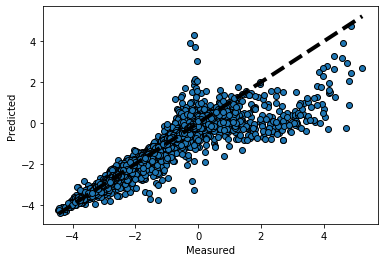

In [13]:
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

SVM = SVR(**grid.best_params_).fit(X_train, y_train)
predict_y = SVM.predict(X_test)
predict1_y = SVM.predict(X_train)
mse = mean_squared_error(y_test, predict_y)
rmse = np.sqrt(mse)
print("R2 on training set:%f" % SVM.score(X_train, y_train))
print("R2 on test set:%f" % SVM.score(X_test, y_test))
print("mse: %f, rmse: %f" % (mse, rmse))

fig, ax = plt.subplots()
ax.scatter(y_test, predict_y, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Test for consistency in accuracy validation (Changing Random State)

In [ ]:
from sklearn import metrics
ytests = []
ypreds = []

fig, ax = plt.subplots()
for i in range(0,150,15):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, test_size=0.1,random_state=i, shuffle=True)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    normalizer = preprocessing.Normalizer().fit(X_train)
    X_train=normalizer.transform(X_train)
    X_test=normalizer.transform(X_test)
    param_grid = {'C': [1, 5, 10, 30, 50, 100],'gamma': [0.001, 0.01, 0.1, 1]}
    grid = GridSearchCV(SVR(), param_grid=param_grid, cv=10)
    grid.fit(X_train, y_train)
    SVM = SVR(**grid.best_params_).fit(X_train, y_train)
    predict_y = SVM.predict(X_test)
    predict1_y = SVM.predict(X_train)
    mse = mean_squared_error(y_test, predict_y)
    rmse = np.sqrt(mse)
    print("R2 on test set:%f" % SVM.score(X_test, y_test))
    ytests += list(y_test)
    ypreds += list(predict_y)
    # plotting lowest score
    if i == 15:
        ax.scatter(y_test, predict_y, color=(1,0,0), edgecolors=(0, 0, 0))
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    # plotting highest score
    if i == 120:
        ax.scatter(y_test, predict_y, color=(0,1,0), edgecolors=(0, 0, 0))
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    # plotting mid point
    #if i == 30:
        #ax.scatter(y_test, predict_y, edgecolors=(0, 0, 0))
        #ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)    
        
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')    
plt.show()

R2 on test set:0.931341
